In [2]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

w[0]: 0.393906  b: -0.031804


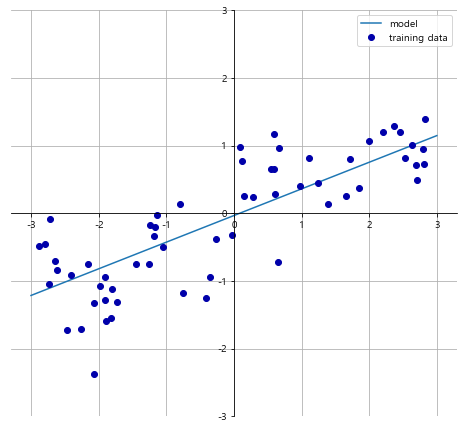

In [3]:
mglearn.plots.plot_linear_regression_wave() # mglearn 샘플 그래프 보기

In [5]:
# 일반화 성능 평가를 위해 기존 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
# 60개의 샘플 데이터 준비
from sklearn.linear_model import LinearRegression

In [6]:
# Wave데이터셋 준비 : 60개의 샘플 데이터
X, y = mglearn.datasets.make_wave(n_samples=60)

# 훈련, 테스트 데이터셋 준비 : 섞고, 자르기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [7]:
# 선형 회귀 모델에 훈련!
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print("lr의 계수(weight 또는 cofficient) : {}".format(lr.coef_)) # w(weight)은 배열형태로 나옴
print("lr의 편향(offset 또는 intercept) : {}".format(lr.intercept_))  # b(offset)

lr의 계수(weight 또는 cofficient) : [0.39390555]
lr의 편향(offset 또는 intercept) : -0.031804343026759746


In [16]:
print("wave 훈련 세트 점수 : {}".format(lr.score(X_train,y_train)))
print("wave 테스트 세트 점수 : {}".format(lr.score(X_test, y_test)))

wave 훈련 세트 점수 : 0.9523526436864237
wave 테스트 세트 점수 : 0.6057754892935652


w(weight)은 배열형태로 나옴
b(offset)

회귀에서의 점수는 R2 (결정계수)이 score가 된다.

In [15]:
# feature가 많은 보스턴 데이터 세트로 선형회귀 확인 : 보스턴 부동산 데이터셋
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("보스턴 훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("보스턴 테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

보스턴 훈련 세트 점수 : 0.95
보스턴 테스트 세트 점수 : 0.61


확실한 과대적합이라 보면된다 > 가중치를 낮춰주면 된다

* 선형회귀 방식

1 Ridge방식(더 많이 씀)
 - MSE
 - L2 NORM
 - 모든 특성의 가중치를 0에 수렴하도록 만듬(0은 안만듬) : 입력된 특징을 다 사용
 - y = w[0]∗x[0] + w[1]∗x[1] + b 에서 w[0]을 0입력은 안해서 다씀
 
2 Lasso방식
 - MAE
 - L1 NORM

1 2 공통점 : alpha(조절parameter)로 가중치 조절가능

 - 가중치를 조절하는 parameter : alpha(penalty)값 

cf. L1,L2 norm 섞어쓰는것 : 엘라스틴 norm






 $alpha$ 값은 보통 로그 스케일(100,10,1,0.1,0.01....)으로 부여하는 것이 일반적

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [24]:
# ridge에 alpha값을 부여 > 그래프 왼쪽으로
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [25]:
# ridge에 낮은 alpha값 > 그래프 오른쪽으로
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


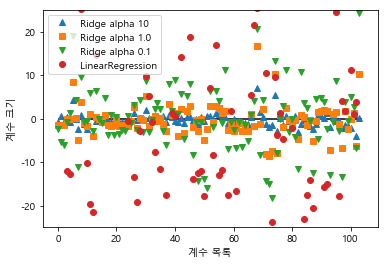

In [26]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha 10")
plt.plot(ridge.coef_, 's', label="Ridge alpha 1.0")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha 0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

* alpha의 특징 : w(가중치) 억제 
 - alpha ↑  w ↓